In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch

import penne

/home/max/conda/envs/penne/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
penne.CONFIG = 'deepf0++'

# Batch size
penne.BATCH_SIZE = 128

# Width of a pitch bin
penne.CENTS_PER_BIN = 5  # cents

# Whether to peak-normalize CREPE input audio
penne.NORMALIZE_INPUT = False

# Loss function
penne.LOSS = 'categorical_cross_entropy'

# The name of the model to use for training
penne.MODEL = 'deepf0'

# Type of model normalization
penne.NORMALIZATION = 'layer'

# Number of pitch bins to predict
penne.PITCH_BINS = 1440


In [ ]:
penne.CONFIG = 'crepe++'

# Batch size
penne.BATCH_SIZE = 128

# Width of a pitch bin
penne.CENTS_PER_BIN = 5  # cents

# Whether to peak-normalize CREPE input audio
penne.NORMALIZE_INPUT = True

# The dropout rate. Set to None to turn off dropout.
penne.DROPOUT = None

# Loss function
penne.LOSS = 'categorical_cross_entropy'

# Type of model normalization
penne.NORMALIZATION = 'layer'

# Number of pitch bins to predict
penne.PITCH_BINS = 1440


In [4]:
penne.FMAX = penne.FMIN * \
    2 ** (penne.PITCH_BINS * penne.CENTS_PER_BIN / penne.OCTAVE)


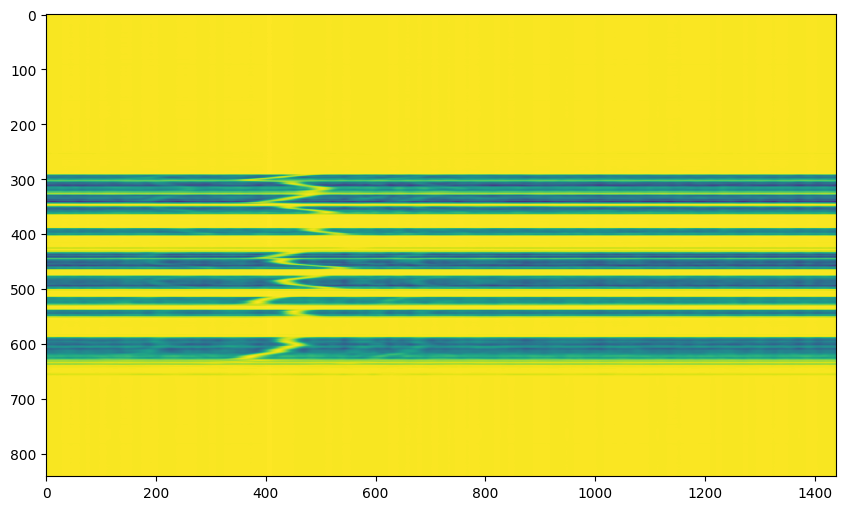

In [10]:
model = 'deepf0'
audio = penne.load.audio("../data/datasets/ptdb/SPEECH DATA/MALE/MIC/M01/mic_M01_sa1.wav")
gpu = 0

logits = []

# Preprocess audio
iterator = penne.preprocess(
    audio,
    penne.SAMPLE_RATE,
    model=model,
    batch_size=None)
for frames, bins, *_ in iterator:

    # Copy to device
    frames = frames.to('cpu' if gpu is None else f'cuda:{gpu}')

    # Infer
    logits = penne.infer(
        frames, model, f"../runs/{model}++/00250000.pt").detach()

    # Reconstruct
    start = penne.WINDOW_SIZE - penne.HOPSIZE // 2
    end = start + penne.HOPSIZE
    waveform = frames[:, :, start:end].squeeze().flatten().cpu()

# Concatenate results
# logits = torch.cat(logits)

# Setup figure
figure = plt.figure(figsize=(18, 6))

# Plot logits
plt.imshow(logits.cpu().squeeze().T)

In [ ]:
plt.plot(waveform)
plt.plot(audio.squeeze())

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(logits.squeeze())

In [ ]:
plt.plot(logits.argmax(dim=1))